# Problem 1

Import all required libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Define the problem and perform exploratory Data Analysis

In [45]:
# Reading data
compactive = pd.read_excel('compactiv.xlsx')
compactive.shape   # Get number of rows and cols

(8192, 22)

In [46]:
compactive.head() # View some records to get an idea

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [47]:
compactive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [48]:
#Some stats about each column
compactive.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [49]:
# How many unique values are present in each column?
compactive.nunique()

lread        235
lwrite       189
scall       4115
sread        794
swrite       640
fork         228
exec         386
rchar       7898
wchar       7925
pgout        404
ppgout       774
pgfree      1070
pgscan      1202
atch         253
pgin         832
ppgin       1072
pflt        2987
vflt        3799
runqsz         2
freemem     3165
freeswap    7658
usr           56
dtype: int64

In [50]:
# Are there any null values?
compactive.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [51]:
# Are there any duplicated rows?
compactive.duplicated().sum()

0

Observations:

- There are 8192 observations recorded for about 22 different features.
- There are no duplicated rows for this dataset.
- All features except runqsz can be treated as continuous variables. runqsz is categorical having two classes: CPU_Bound and CPU_Not_Bound.
- Null values are present. rchar has 104 nulls and wchar has 15 nulls.

### Univariate analysis

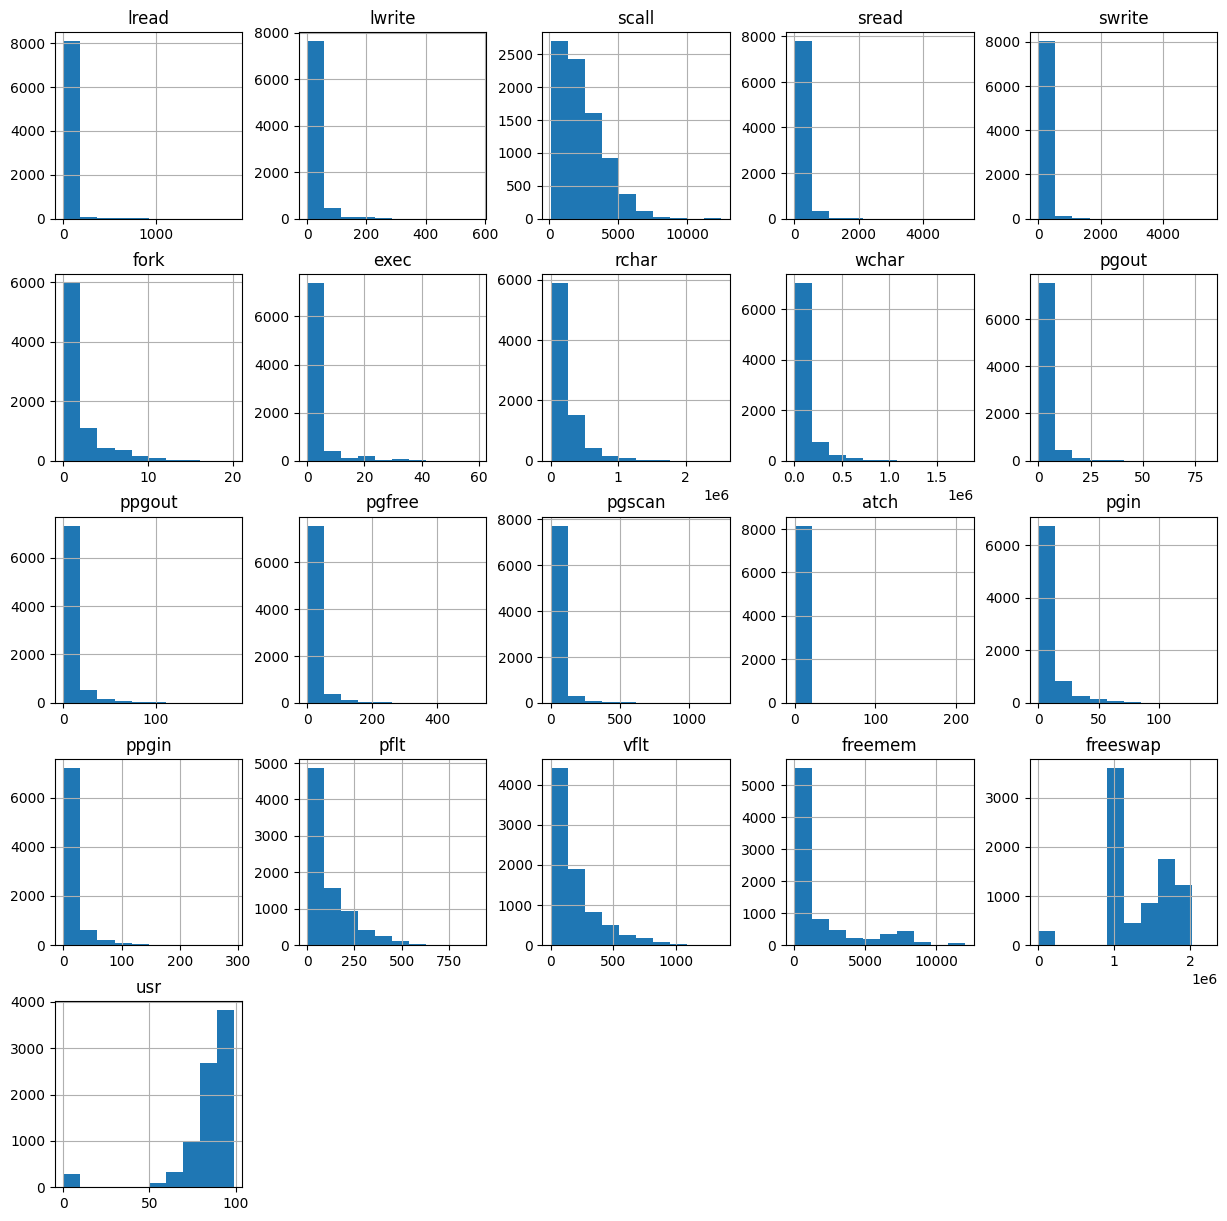

In [52]:
compactive.hist(figsize=(15,15))
plt.show()


In [53]:
# Creating an empty dictionary to store the percentage of 0 value in each column
zero_percent = {}

# Looping through each column of the data
for col in compactive.columns:
    zero_count = (compactive[col] == 0).sum()
    zero_percent[col] = (zero_count / len(compactive)) * 100
zero_percent

{'lread': 8.23974609375,
 'lwrite': 32.763671875,
 'scall': 0.0,
 'sread': 0.0,
 'swrite': 0.0,
 'fork': 0.25634765625,
 'exec': 0.25634765625,
 'rchar': 0.0,
 'wchar': 0.0,
 'pgout': 59.5458984375,
 'ppgout': 59.5458984375,
 'pgfree': 59.43603515625,
 'pgscan': 78.7109375,
 'atch': 55.84716796875,
 'pgin': 14.892578125,
 'ppgin': 14.892578125,
 'pflt': 0.03662109375,
 'vflt': 0.0,
 'runqsz': 0.0,
 'freemem': 0.0,
 'freeswap': 0.0,
 'usr': 3.45458984375}

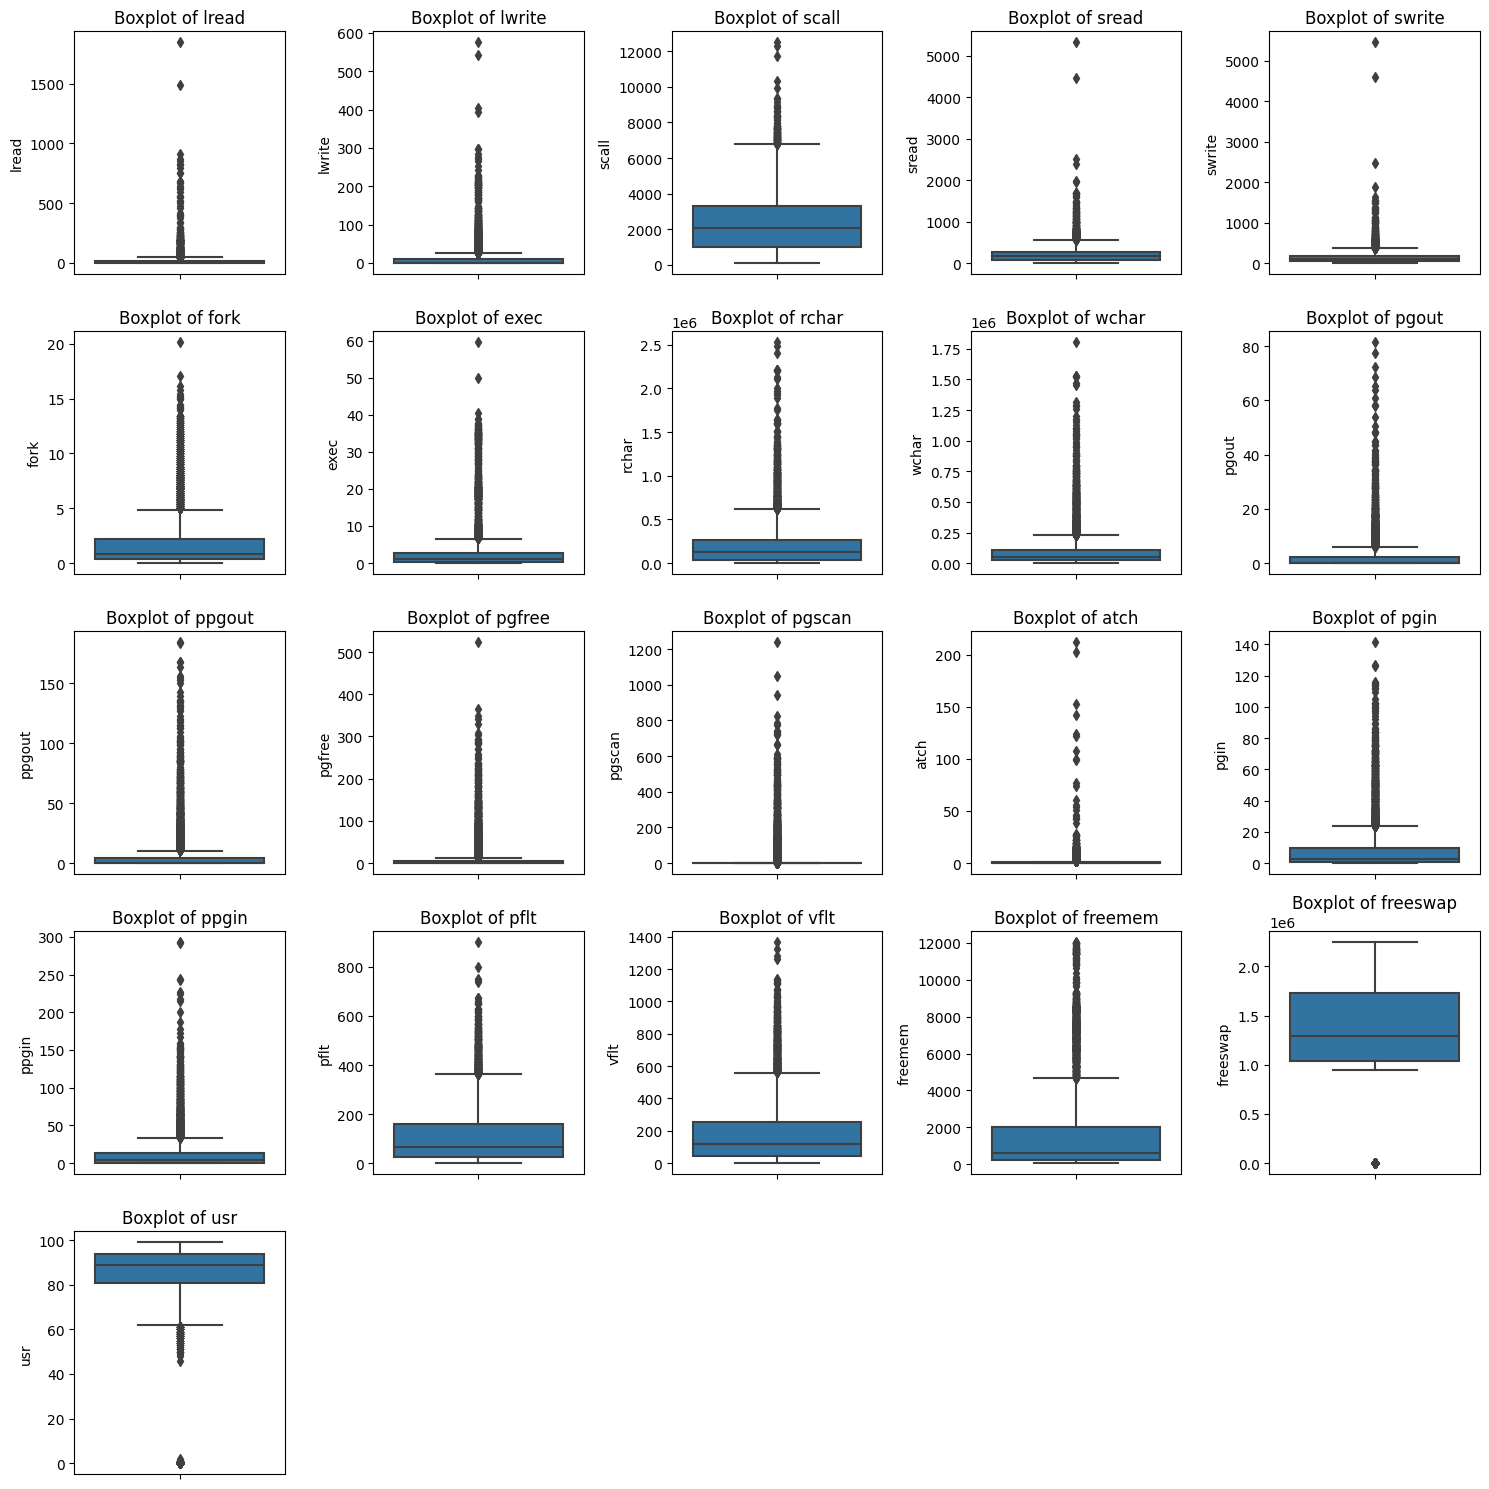

In [54]:
# Seelct only integer and floats to display boxplot
compactive_num = compactive.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize = (15, 15))
boxplot_features = compactive_num.columns

for i in range(len(boxplot_features)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y = compactive_num[boxplot_features[i]], data=compactive_num)
    plt.title(f"Boxplot of {boxplot_features[i]}")
    plt.tight_layout()


## Bivariate Analysis

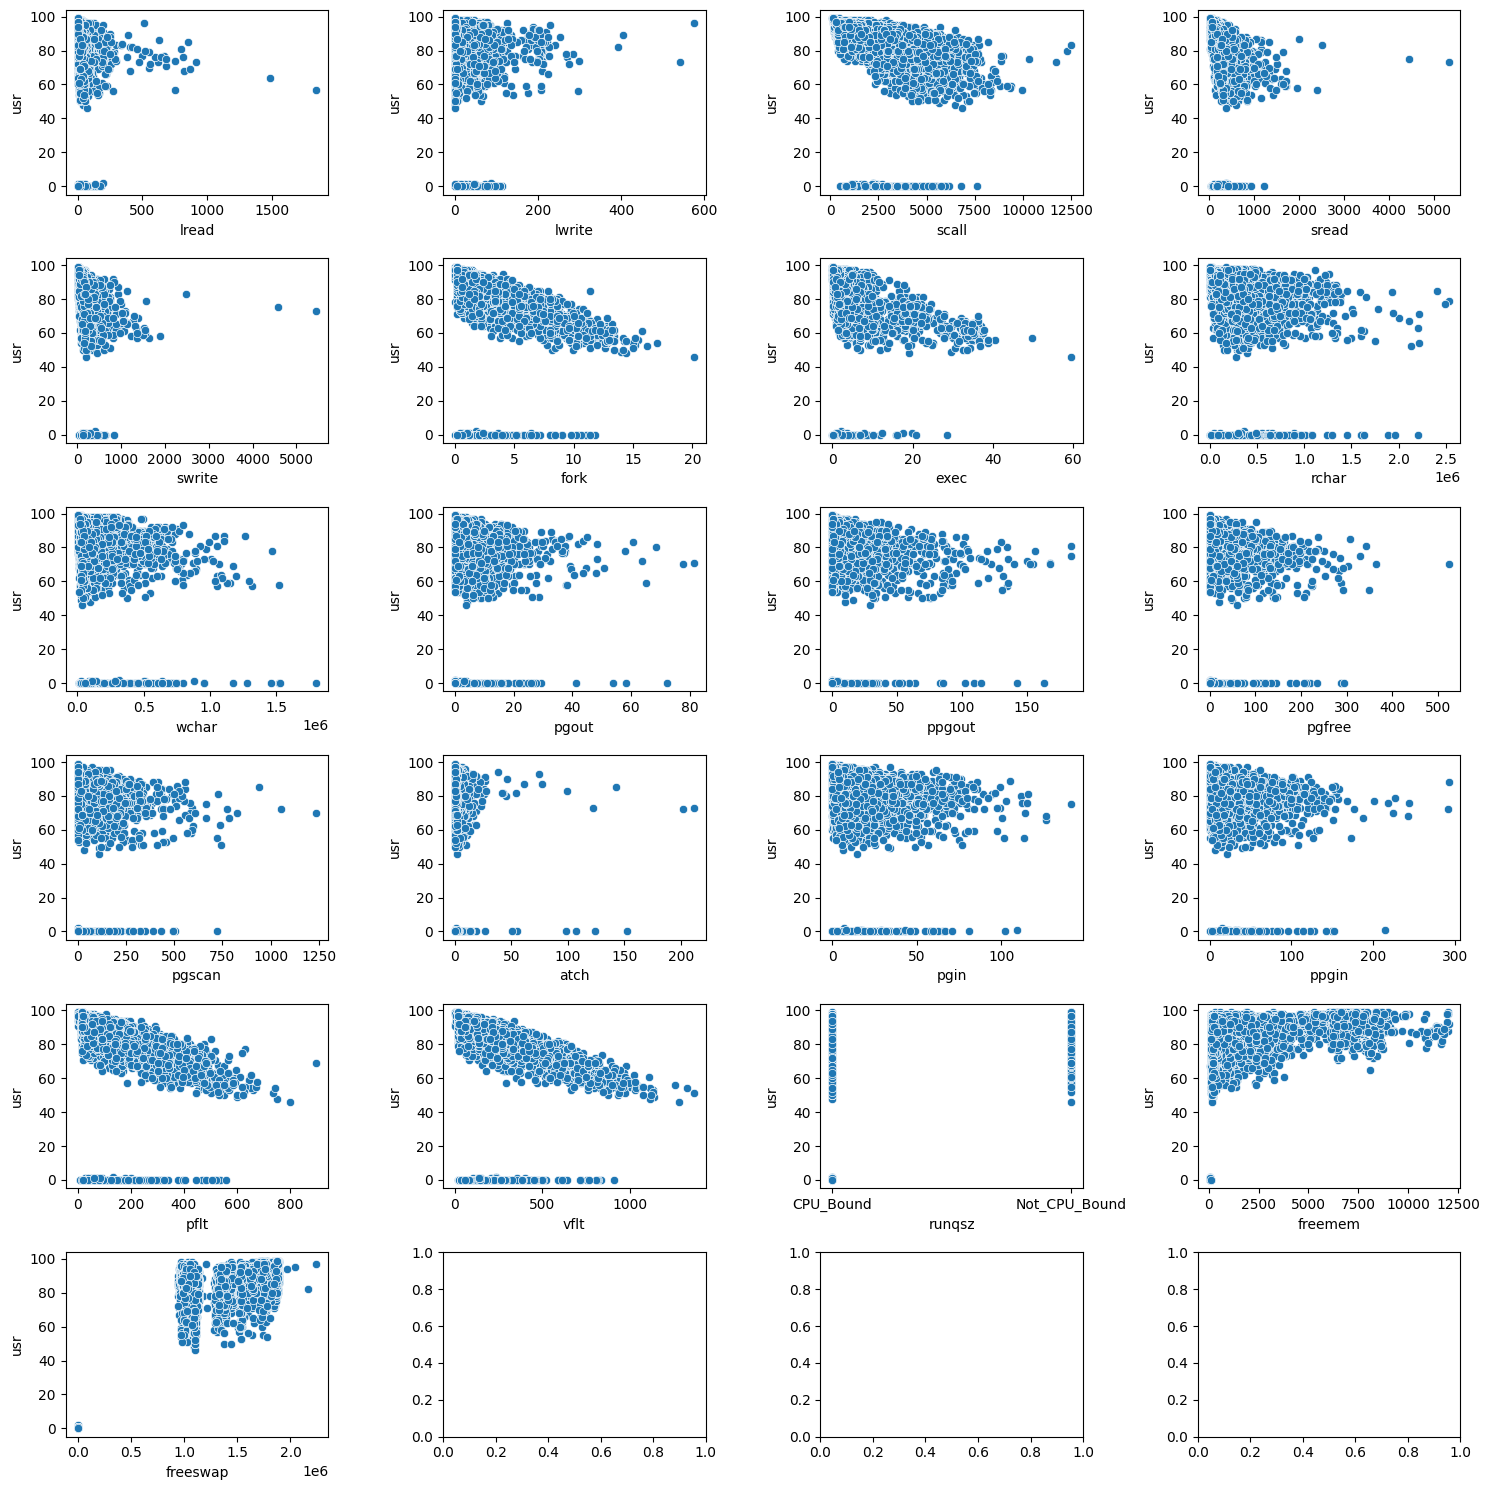

In [55]:
fig, axes = plt.subplots(6, 4, figsize=(15,15))
for i, col in enumerate(compactive.columns[:-1]):
    sns.scatterplot(x=col, y='usr', data=compactive, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

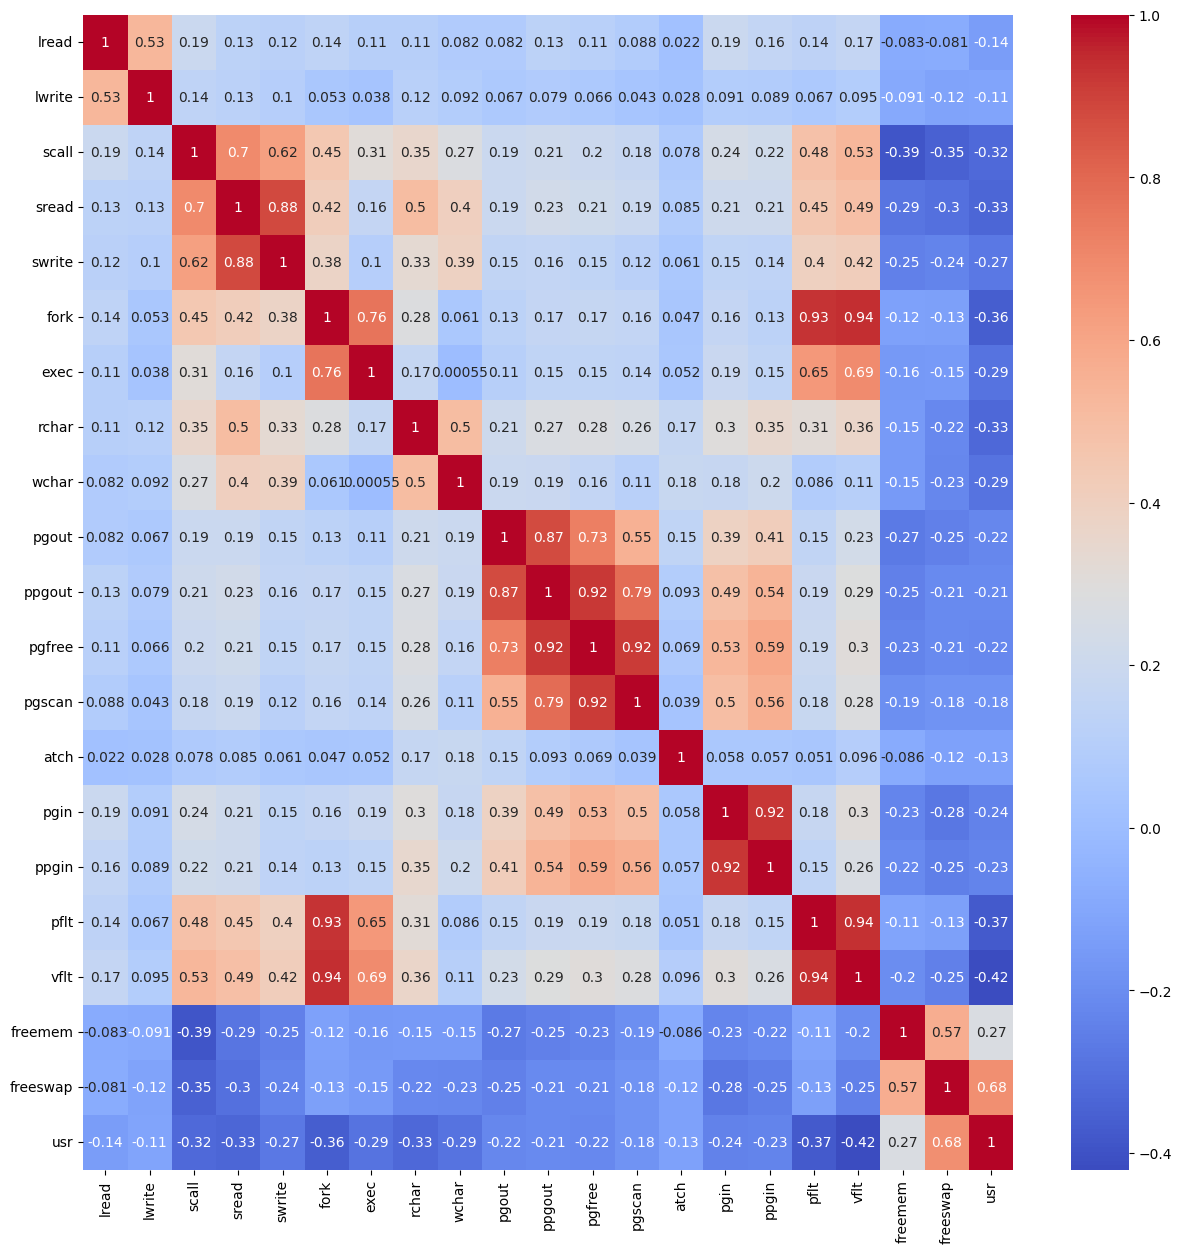

In [56]:
# Plotting a correlation heatmap for the numerical variables
plt.figure(figsize=(15,15))
sns.heatmap(compactive_num.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Pre-Processing

Missing value treatment

In [57]:
wchar_median = compactive['wchar'].median()
compactive['wchar'] = compactive['wchar'].replace(np.nan, wchar_median)
rchar_median = compactive['rchar'].median()
compactive['rchar'] = compactive['rchar'].replace(np.nan, rchar_median)
compactive.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [58]:
compactive.lwrite.replace(to_replace = 0, value = compactive.lwrite.median(),inplace=True)
compactive.pgin.replace(to_replace=0,value=compactive.pgin.median(),inplace=True)
compactive.ppgin.replace(to_replace=0,value=compactive.ppgin.median(),inplace=True)

Outlier treatment

In [59]:
# Lets try to treat outliers by using the IQR values
for i in boxplot_features:
    sorted(compactive[i])
    quartile_1, quartile_3 = np.percentile(compactive[i], [25, 75])
    IQR = quartile_3 - quartile_1
    low = quartile_1 - (1.5*IQR)
    up = quartile_3 + (1.5*IQR)
    compactive[i] = np.where(compactive[i]>up, up, compactive[i])
    compactive[i] = np.where(compactive[i]<low, low, compactive[i])
    

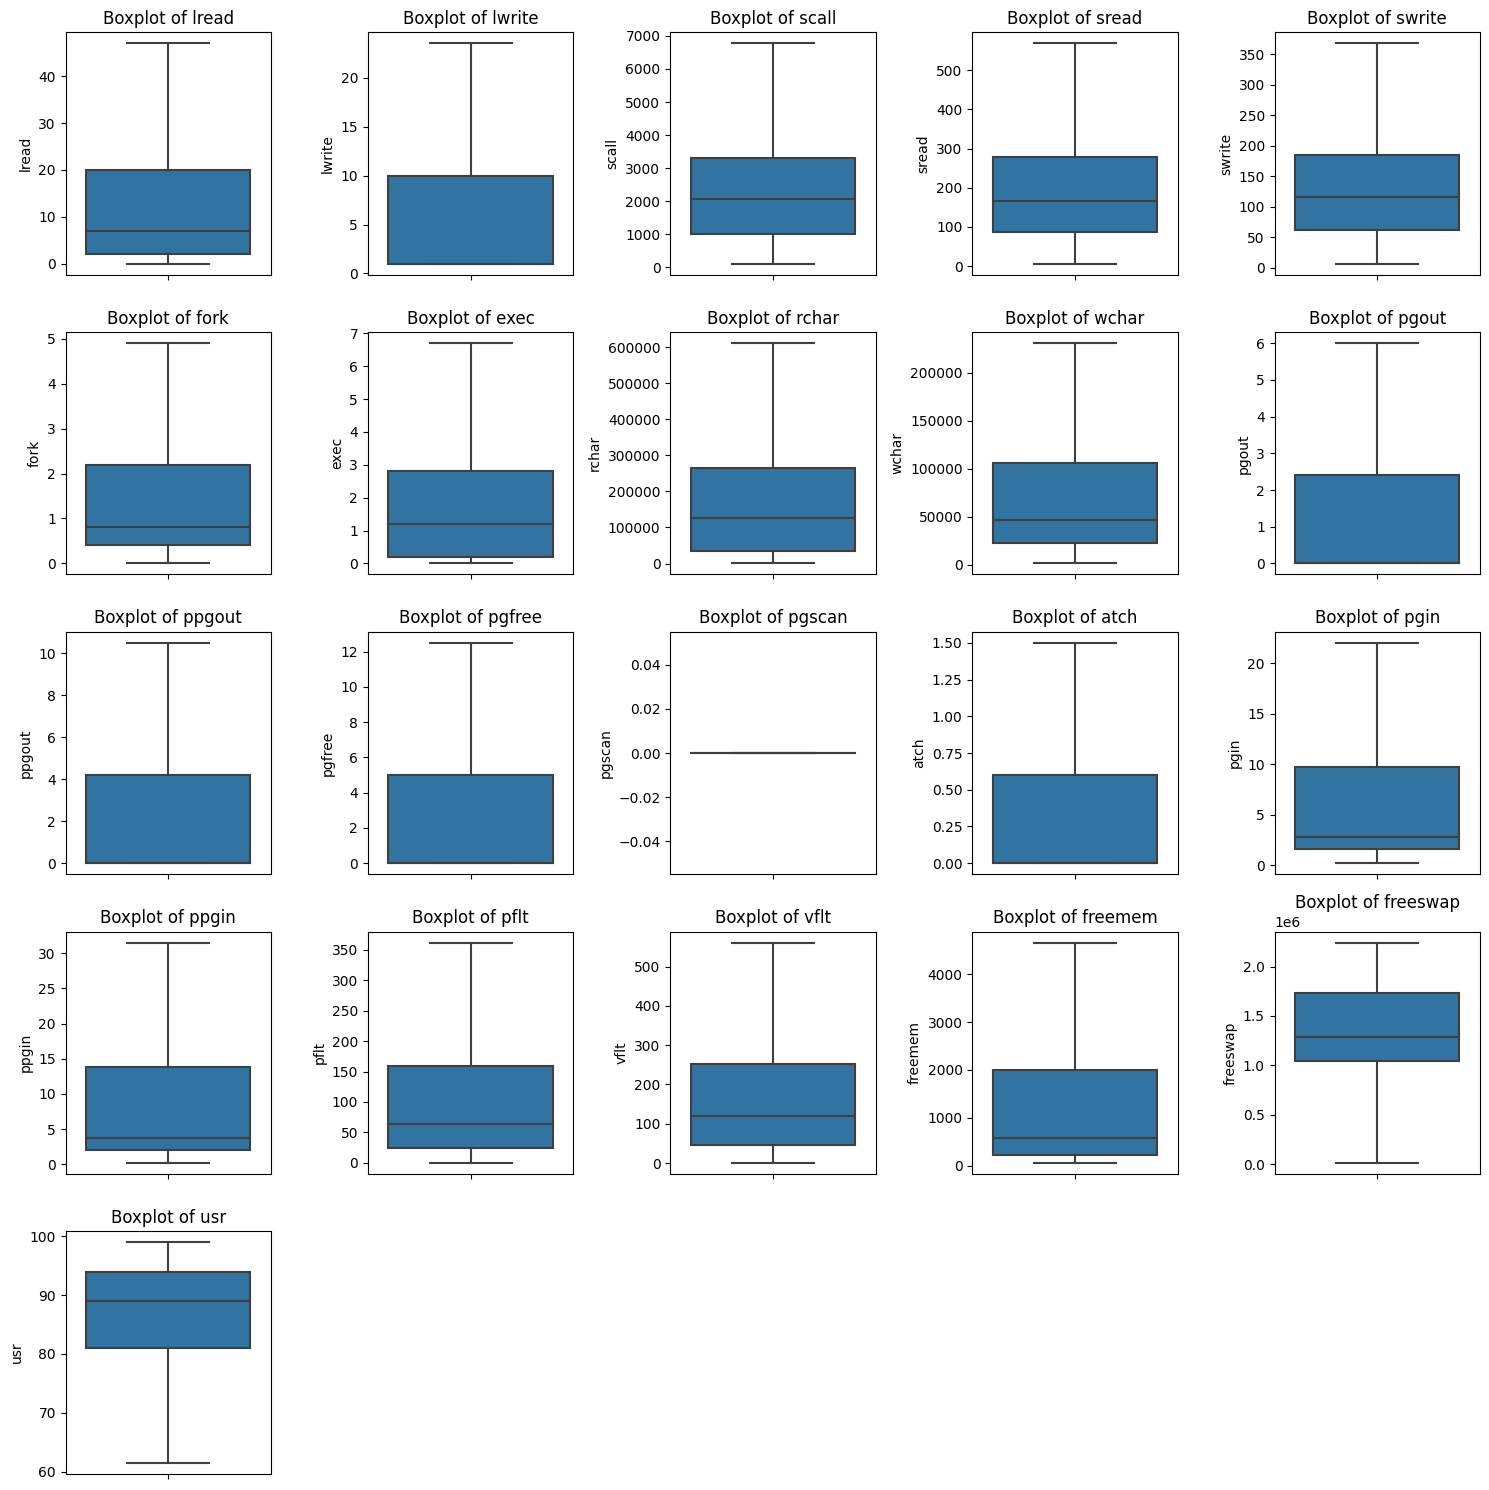

In [60]:
# Check if have removed outliers?
plt.figure(figsize = (15, 15))
for i in range(len(boxplot_features)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y = compactive[boxplot_features[i]], data=compactive)
    plt.title(f"Boxplot of {boxplot_features[i]}")
    plt.tight_layout()

Dropping irrelavant columns and handling zeros

In [61]:
compactive.drop(['pgout', 'ppgout', 'pgfree', 'pgscan', 'atch'], axis = 1, inplace = True)
compactive.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1.0,1.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,CPU_Bound,4659.125,1730946.0,95.0
1,0.0,1.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,2.8,3.8,15.63,16.83,Not_CPU_Bound,4659.125,1869002.0,97.0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,Not_CPU_Bound,702.000,1021237.0,87.0
3,0.0,1.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,4659.125,1863704.0,98.0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633.000,1760253.0,90.0


In [62]:
compactive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   object 
 14  freemem   8192 non-null   float64
 15  freeswap  8192 non-null   float64
 16  usr       8192 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.1+ MB


In [63]:
# Creating a copy of the transformed data
df_encoded = compactive.copy()

# Encoding the categorical variable
df_encoded['runqsz'] = df_encoded['runqsz'].map({'CPU_Bound': 1, 'Not_CPU_Bound': 0})

In [64]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   int64  
 14  freemem   8192 non-null   float64
 15  freeswap  8192 non-null   float64
 16  usr       8192 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 1.1 MB


### Model Building - Linear regression

Train Test split

In [65]:
# Train and testset
lr_data = df_encoded.copy()
X = lr_data.drop('usr', axis=1)
y = lr_data[['usr']]

In [66]:
# Train test split using 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


In [67]:
# Build model using sklearn
# =================================
reg_model_1 = LinearRegression()
reg_model_1.fit(X_train,y_train)

LinearRegression()

In [68]:
# now, print out the coeffs of each predictor
for index, col in enumerate(X_train.columns):
    print(f"Coefficient of {col}: {reg_model_1.coef_[0][index]}")

Coefficient of lread: -0.059293300704742306
Coefficient of lwrite: 0.0435004587350262
Coefficient of scall: -0.0007248548562871292
Coefficient of sread: 0.0024283994090468154
Coefficient of swrite: -0.006087231101542176
Coefficient of fork: -0.07329959943729294
Coefficient of exec: -0.2375317651437474
Coefficient of rchar: -4.7747390953460225e-06
Coefficient of wchar: -5.934355102264134e-06
Coefficient of pgin: 0.05478543322265029
Coefficient of ppgin: -0.10755999160631284
Coefficient of pflt: -0.03363307879375129
Coefficient of vflt: -0.00588079043248122
Coefficient of runqsz: -1.6386957852197734
Coefficient of freemem: -0.00037070025301107987
Coefficient of freeswap: 9.206886625014937e-06


In [69]:
# Whats the intercept
interc = reg_model_1.intercept_[0]
print("Intercept: ", interc)

Intercept:  84.91118850871894


In [70]:
# R^2 on train data
reg_model_1.score(X_train, y_train)


0.7898610138395787

In [71]:
reg_model_1.score(X_test, y_test)

0.7751105143126491

In [72]:
#RMSE
predict_train = reg_model_1.fit(X_train, y_train).predict(X_train)
print(np.sqrt(mean_squared_error(y_train, predict_train)))
predict_test = reg_model_1.fit(X_test, y_test).predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predict_test)))

4.4731547670926615
4.577018475186846


In [73]:
# Similarly, build a model using statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
reg_model_2 = sm.OLS(y_train, X_train).fit()

reg_model_2

In [74]:
reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1343.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:09:15   Log-Likelihood:                -16726.
No. Observations:                5734   AIC:                         3.349e+04
Df Residuals:                    5717   BIC:                         3.360e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9112      0.295    287.775      0.000      84.333      85.490
lread         -0.0593      0.009     -6.766      0.000      -0.076      -0.042
lwrite         0.0435      0.014      3.136      0.002       0.016       0.071
scall         -0.0007   6.38e-05    -11.368      0.000      -0.001      -0.001
sread          0.0024      0.001      2.334      0.020       0.000       0.004
swrite        -0.0061      0.001     -4.148      0.000      -0.009      -0.003
fork          -0.0733      0.134     -0.548      0.584      -0.335       0.189
exec          -0.2375      0.052     -4.611      0.000      -0.339      -0.137
rchar      -4.775e-06   4.88e-07     -9.793      0.000   -5.73e-06   -3.82e-06
wchar      -5.934e-06   1.04e-06     -5.692      0.000   -7.98e-06   -3.89e-06
pgin           0.0548      0.031      1.779      0.075      -0.006       0.115
ppgin         -0.1076      0.021     -5.084      0.000      -0.149      -0.066
pflt          -0.0336      0.002    -16.942      0.000      -0.038      -0.030
vflt          -0.0059      0.001     -4.171      0.000      -0.009      -0.003
runqsz        -1.6387      0.126    -12.966      0.000      -1.886      -1.391
freemem       -0.0004    4.8e-05     -7.720      0.000      -0.000      -0.000
freeswap    9.207e-06   1.91e-07     48.167      0.000    8.83e-06    9.58e-06
==============================================================================
Omnibus:                      995.867   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1985.795
Skew:                          -1.049   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     7.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
#RMSE for statsmodel
predict_train_sm = reg_model_2.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, predict_train_sm)))
predict_test_sm = reg_model_2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, predict_test_sm)))

4.4731547670926615
4.61140590686205


In [76]:
# Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inf_fact = [variance_inflation_factor(X.values, idex) for idex in range(X.shape[1])] 
for col in X.columns:
    print("{}: {}".format(col, var_inf_fact[X.columns.get_loc(col)]))

lread: 9.003372029095829
lwrite: 6.557630581223961
scall: 9.049734303776733
sread: 18.52325988654488
swrite: 16.839669021750957
fork: 24.656981600548924
exec: 5.872915301253695
rchar: 4.2323737985572265
wchar: 3.3749006839744067
pgin: 23.83487755385833
ppgin: 23.531877782074826
pflt: 23.90041752511795
vflt: 31.700647722374082
runqsz: 2.134619033899191
freemem: 2.9612437227116537
freeswap: 6.170099833592154


There is some level of multi collinearity present within the dataset since ideal range of VIF is within 1 to 5.

In [77]:
# Generate model equation
# =============================================
for coeff, param in np.array(reg_model_2.params.reset_index()):
    print(f'({round(param, 2)}) * {coeff} +', end=' ')

(84.91) * const + (-0.06) * lread + (0.04) * lwrite + (-0.0) * scall + (0.0) * sread + (-0.01) * swrite + (-0.07) * fork + (-0.24) * exec + (-0.0) * rchar + (-0.0) * wchar + (0.05) * pgin + (-0.11) * ppgin + (-0.03) * pflt + (-0.01) * vflt + (-1.64) * runqsz + (-0.0) * freemem + (0.0) * freeswap + 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [79]:
# Load data and view it
contraceptive = pd.read_excel('Contraceptive_method_dataset.xlsx')
contraceptive



,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes


In [80]:
# View shape
contraceptive.shape

(1473, 10)

In [81]:
# Some info
contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [82]:
#Some stats about each column
contraceptive.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [83]:
# How many unique values are present in each column?
contraceptive.nunique()

Wife_age                     34
Wife_ education               4
Husband_education             4
No_of_children_born          15
Wife_religion                 2
Wife_Working                  2
Husband_Occupation            4
Standard_of_living_index      4
Media_exposure                2
Contraceptive_method_used     2
dtype: int64

In [84]:
# Are there any null values?
contraceptive.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [85]:
# Are there any duplicated rows?
contraceptive.duplicated().sum()

80

Observations:
- Dataset contains 1473 observations and 10 features.
- There are 2 float objects (No_of_children_born, Wife_age), 1 int object (Husband_Occupation), and 7 objects (Wife_education, Husband_education, Wide_religion, Wife_working, Standard_of_living_index, living_exposure and Contraceptive_method_used)
- There are 80 duplicate rows which need to be handled in data processing stage.
- There are 71 null values in Wife_age column and 21 null values in No_of_children_born column.
- Husband_Occupation seems to be a categorical variable with 4 categories (1,2,3,4).

In [86]:
# Drop the duplciated rows
contraceptive.drop_duplicates(inplace=True)
contraceptive.duplicated().sum()

0

In [87]:
# Replace missing valeus with their median
age_median = contraceptive['Wife_age'].median()
contraceptive['Wife_age'] = contraceptive['Wife_age'].replace(np.nan, age_median)
No_of_children_born_median = contraceptive['No_of_children_born'].median()
contraceptive['No_of_children_born'] = contraceptive['No_of_children_born'].replace(np.nan, No_of_children_born_median)
print(contraceptive.isnull().sum())
print(contraceptive.shape)

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64
(1393, 10)


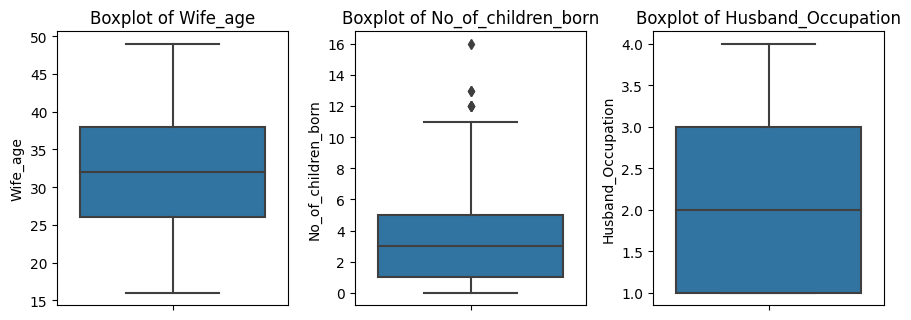

In [88]:
# Seelct only integer and floats to display boxplot
contraceptive_num = contraceptive.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize = (15, 15))
boxplot_features = contraceptive_num.columns

for i in range(len(boxplot_features)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y = contraceptive_num[boxplot_features[i]], data=contraceptive_num)
    plt.title(f"Boxplot of {boxplot_features[i]}")
    plt.tight_layout()


In [89]:
# Lets try to treat outliers by using the IQR values
for i in boxplot_features:
    sorted(contraceptive[i])
    quartile_1, quartile_3 = np.percentile(contraceptive[i], [25, 75])
    IQR = quartile_3 - quartile_1
    low = quartile_1 - (1.5*IQR)
    up = quartile_3 + (1.5*IQR)
    contraceptive[i] = np.where(contraceptive[i]>up, up, contraceptive[i])
    contraceptive[i] = np.where(contraceptive[i]<low, low, contraceptive[i])

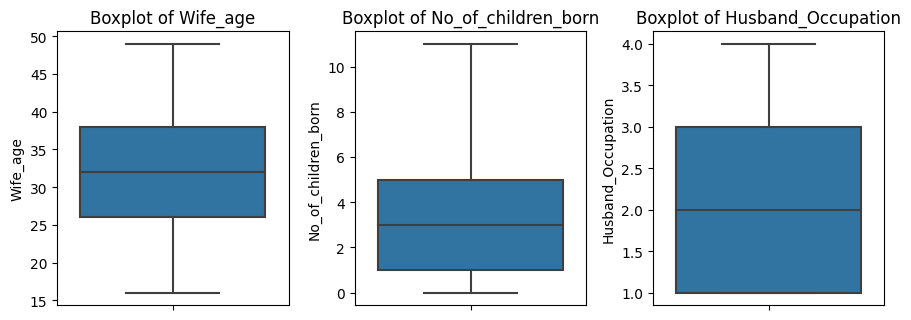

In [90]:
plt.figure(figsize = (15, 15))

for i in range(len(boxplot_features)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y = contraceptive[boxplot_features[i]], data=contraceptive)
    plt.title(f"Boxplot of {boxplot_features[i]}")
    plt.tight_layout()

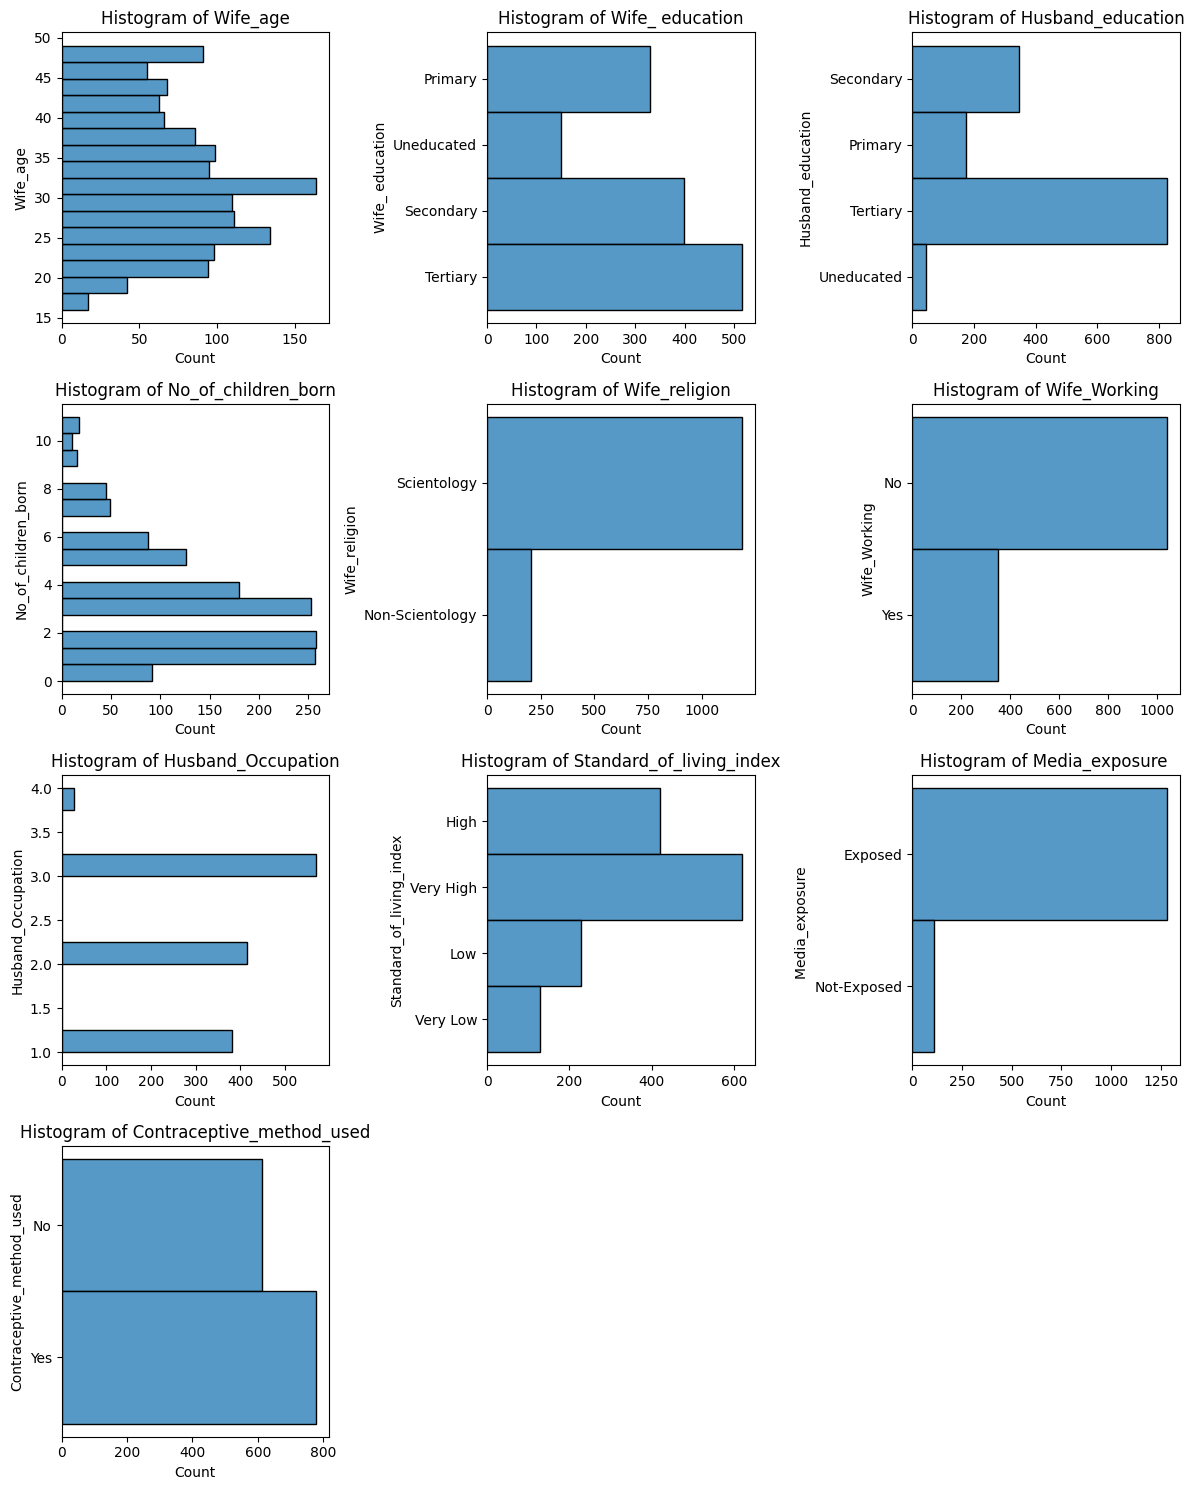

In [91]:
# Univariate Analysis
plt.figure(figsize=(12,15))
all_features= contraceptive.columns
for i in range(len(all_features)): 
    plt.subplot(4, 3, i+1) 
    sns.histplot(y=contraceptive[all_features[i]],data=contraceptive) 
    plt.title('Histogram of {}'.format(all_features[i])) 
    plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

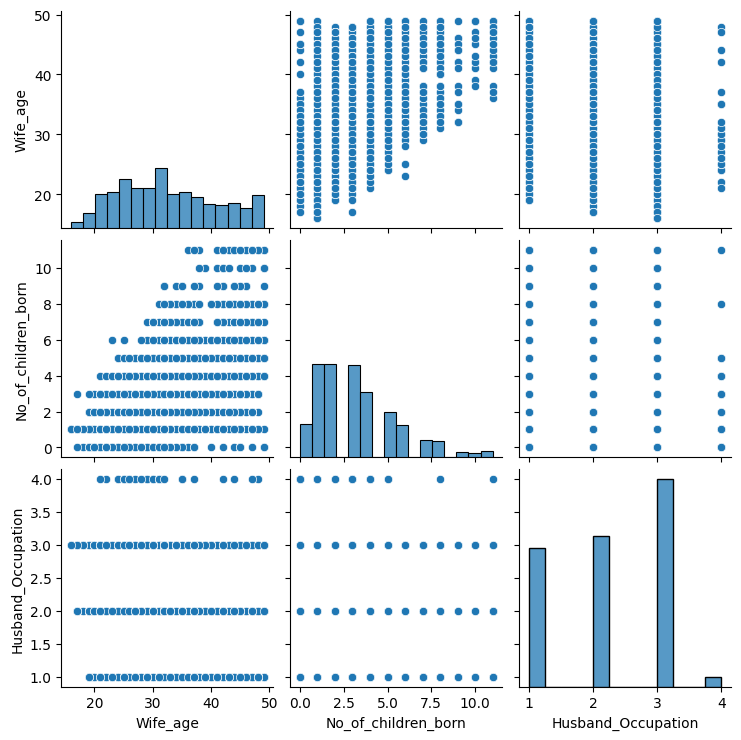

In [92]:
plt.figure(figsize=(12,8))
sns.pairplot(contraceptive)
plt.show()

In [93]:
# convert the object into int8 datatype
for feature in contraceptive.columns:
 if contraceptive[feature].dtype == 'object':
   contraceptive[feature] = pd.Categorical(contraceptive[feature]).codes

In [94]:
contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int8   
 2   Husband_education          1393 non-null   int8   
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int8   
 5   Wife_Working               1393 non-null   int8   
 6   Husband_Occupation         1393 non-null   float64
 7   Standard_of_living_index   1393 non-null   int8   
 8   Media_exposure             1393 non-null   int8   
 9   Contraceptive_method_used  1393 non-null   int8   
dtypes: float64(3), int8(7)
memory usage: 53.1 KB


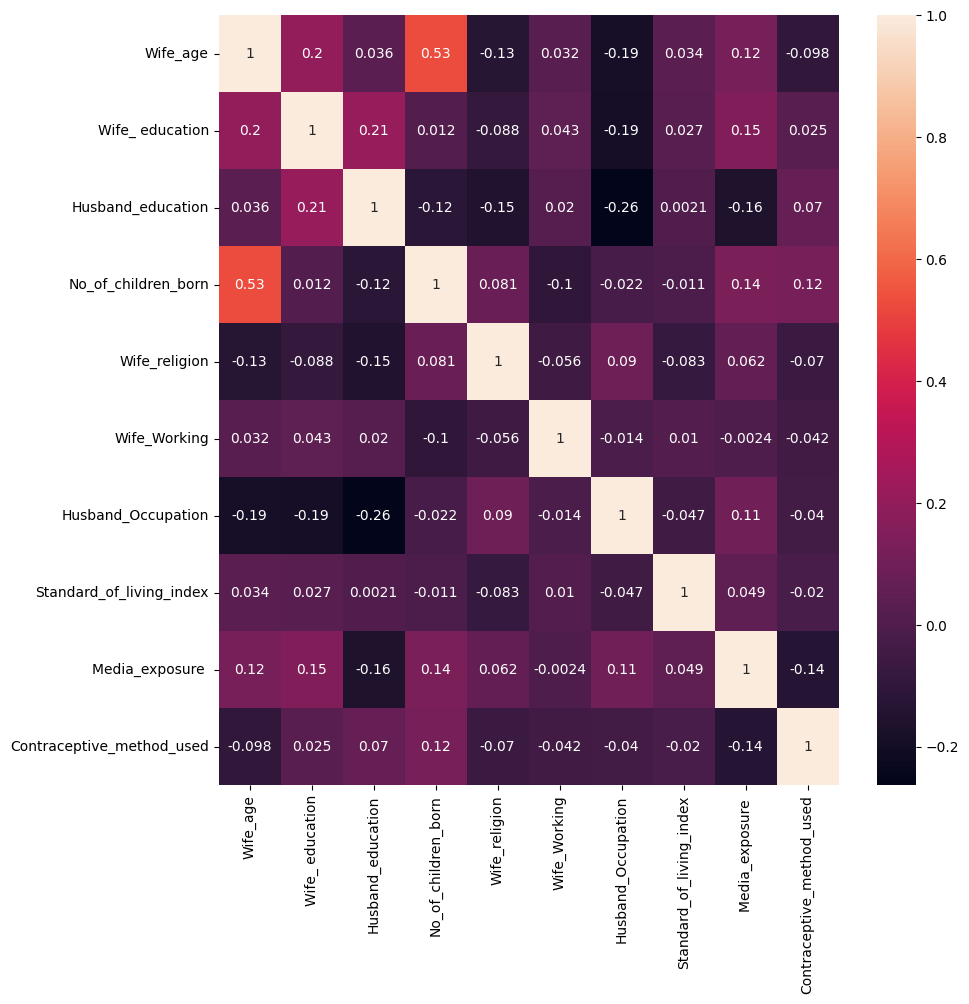

In [95]:
# Check the Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(contraceptive.iloc[:, 0:10].corr(),annot=True)
plt.show()


In [96]:
# start by creating a copy
cart_data = contraceptive.copy()

X = cart_data.drop('Contraceptive_method_used',axis = 1)
y = cart_data.pop("Contraceptive_method_used")

In [97]:
# Train test split using 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [98]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=10, min_samples_split=30)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [99]:
print (pd.DataFrame(decision_tree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.350201
Wife_ education           0.191107
Husband_education         0.010350
No_of_children_born       0.373354
Wife_religion             0.000000
Wife_Working              0.019319
Husband_Occupation        0.037459
Standard_of_living_index  0.018210
Media_exposure            0.000000


In [100]:
# predictions
train_predicts = decision_tree.predict(X_train)
test_predicts = decision_tree.predict(X_test)

In [101]:
# What are the probabilitues?


decision_proba = decision_tree.predict_proba(X_train)
decision_proba = decision_proba[:, 1]
decision_auc = roc_auc_score(y_train, decision_proba)
print('AUC Train: %.2f' % decision_auc)



decision_proba_test = decision_tree.predict_proba(X_test)
decision_proba_test = decision_proba_test[:, 1]
decision_auc_test = roc_auc_score(y_test, decision_proba_test)
print('AUC Test: %.2f' % decision_auc_test)

AUC Train: 0.82
AUC Test: 0.70


In [102]:
confusion_matrix(y_train, train_predicts)
print(classification_report(y_train, train_predicts))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       428
           1       0.75      0.84      0.79       547

    accuracy                           0.75       975
   macro avg       0.75      0.74      0.74       975
weighted avg       0.75      0.75      0.75       975



In [103]:
confusion_matrix(y_test, test_predicts)
print(classification_report(y_test, test_predicts))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       186
           1       0.65      0.81      0.72       232

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



In [104]:
# Finally , the model scores
decision_tree.score(X_train, y_train)


0.7507692307692307

In [105]:
decision_tree.score(X_test, y_test)

0.6507177033492823

In [106]:
# Fit logistic regression model
logistic_regression = LogisticRegression(solver='sag',max_iter=500,penalty='l2',n_jobs=2)
logistic_regression.fit(X_train, y_train)

c:\Users\ANUJ SALWAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, n_jobs=2, solver='sag')

In [107]:
# Performance of the model
log_train_predict = logistic_regression.predict(X_train)
log_test_predict = logistic_regression.predict(X_test)
log_test_predict_prob =logistic_regression.predict_proba(X_test)
print(pd.DataFrame(log_test_predict_prob).head())
print(logistic_regression.score(X_train, y_train))

          0         1
0  0.360206  0.639794
1  0.538728  0.461272
2  0.363298  0.636702
3  0.377851  0.622149
4  0.468154  0.531846
0.6543589743589744


In [108]:
# Classification report for train

confusion_matrix(y_train, log_train_predict)
print(classification_report(y_train, log_train_predict))

              precision    recall  f1-score   support

           0       0.66      0.44      0.53       428
           1       0.65      0.82      0.73       547

    accuracy                           0.65       975
   macro avg       0.66      0.63      0.63       975
weighted avg       0.66      0.65      0.64       975



In [109]:
confusion_matrix(y_test, log_test_predict)
print(classification_report(y_test, log_test_predict))

              precision    recall  f1-score   support

           0       0.65      0.37      0.47       186
           1       0.62      0.84      0.72       232

    accuracy                           0.63       418
   macro avg       0.64      0.61      0.59       418
weighted avg       0.64      0.63      0.61       418



In [110]:
# Fit LDa model
# --------------------------
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [111]:
df = pd.DataFrame(lda_model.coef_, columns=X_train.columns)

df = df.round(2)
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
0,-0.08,0.19,0.18,0.25,-0.67,-0.12,-0.05,-0.02,-1.22


In [112]:
# Prediction
lda_predict_train = lda_model.predict(X_train)
lda_predict_test = lda_model.predict(X_test)

In [113]:
# Classification report
print(classification_report(y_train, lda_predict_train))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53       428
           1       0.66      0.83      0.73       547

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.63       975
weighted avg       0.66      0.66      0.64       975



In [114]:
print(classification_report(y_test, lda_predict_test))

              precision    recall  f1-score   support

           0       0.65      0.37      0.47       186
           1       0.62      0.84      0.72       232

    accuracy                           0.63       418
   macro avg       0.64      0.60      0.59       418
weighted avg       0.63      0.63      0.61       418

